In [1]:
# Proyecto: Red Neuronal Recurrente (LSTM) usando MNIST desde CSV
# Diego Ramos Moreno
# Diplomado en Ciencia de Datos Módulo 6

# Aunque MNIST representa imágenes de 28x28 píxeles, estas pueden interpretarse como secuencias de 28 líneas,
# donde cada línea de píxeles representa un paso en la secuencia, por ello se usa LSTM,
# que es capaz de capturar patrones temporales o secuenciales en los datos pues el orden y la relación entre los elementos de entrada importan.
# Adam se elige por su eficiencia y convergencia en clasificación multiclase en las RNN.

import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Descargar el dataset MNIST en formato .csv desde la URL
url = 'https://pjreddie.com/media/files/mnist_train.csv'
filename = 'mnist_train.csv'
urllib.request.urlretrieve(url, filename)

# Carga del dataset desde el archivo .csv
def load_mnist_csv(path):
    df = pd.read_csv(path)
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values.astype('float32')
    X /= 255.0
    y = to_categorical(y, 10)
    return X, y

X, y = load_mnist_csv('mnist_train.csv')
X = X.reshape(-1, 28, 28)  # Convertir en secuencias
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Red neuronal recurrente con LSTM
class RNN_Network:
    def __init__(self, input_shape, output_size):
        self.model = Sequential()
        self.model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
        self.model.add(Dense(output_size, activation='softmax'))

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def SGD(self, training_data, epochs, batch_size, test_data=None):
        x_train, y_train = training_data
        if test_data:
            x_test, y_test = test_data
            self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                                          validation_data=(x_test, y_test))
        else:
            self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, test_data):
        return self.model.evaluate(*test_data)

# Entrenamiento de la red
rnn_net = RNN_Network(input_shape=(28, 28), output_size=10)
rnn_net.SGD((x_train, y_train), epochs=10, batch_size=64, test_data=(x_test, y_test))

# Precisión en test
loss, accuracy = rnn_net.evaluate((x_test, y_test))
print(f'Precisión en test: {accuracy * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6336 - loss: 1.0903 - val_accuracy: 0.9338 - val_loss: 0.2221
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9419 - loss: 0.1933 - val_accuracy: 0.9563 - val_loss: 0.1473
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9615 - loss: 0.1308 - val_accuracy: 0.9648 - val_loss: 0.1196
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9713 - loss: 0.0991 - val_accuracy: 0.9693 - val_loss: 0.1054
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9745 - loss: 0.0827 - val_accuracy: 0.9734 - val_loss: 0.0913
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9716 - val_loss: 0.0997
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9736 - val_loss: 0.0922
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9833 - loss: 0.0556 - 

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

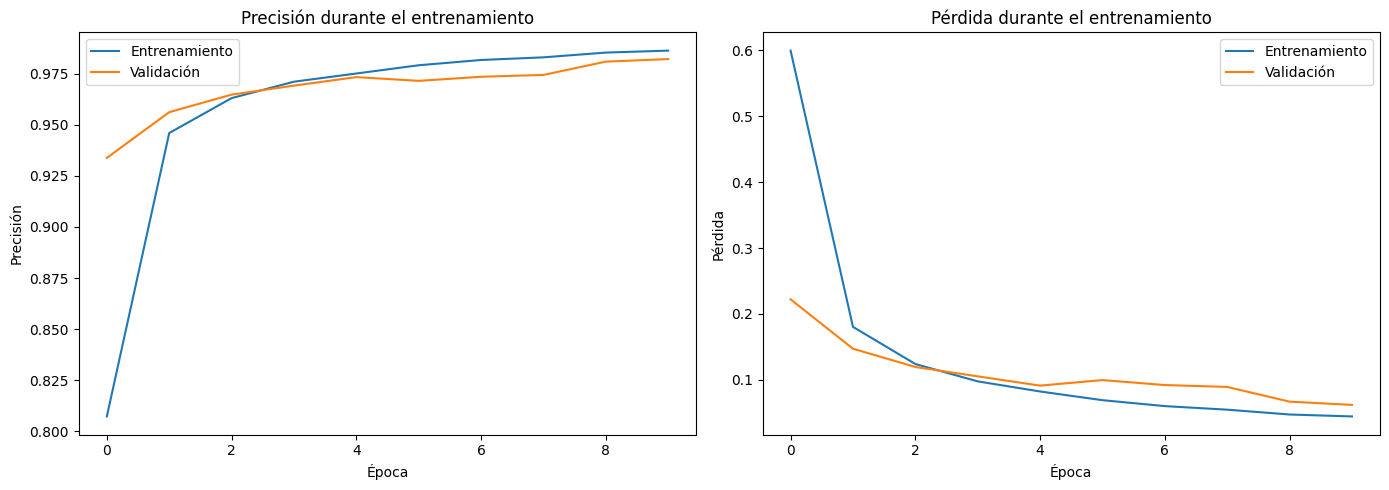

In [2]:
history = rnn_net.history
plt.figure(figsize=(14, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


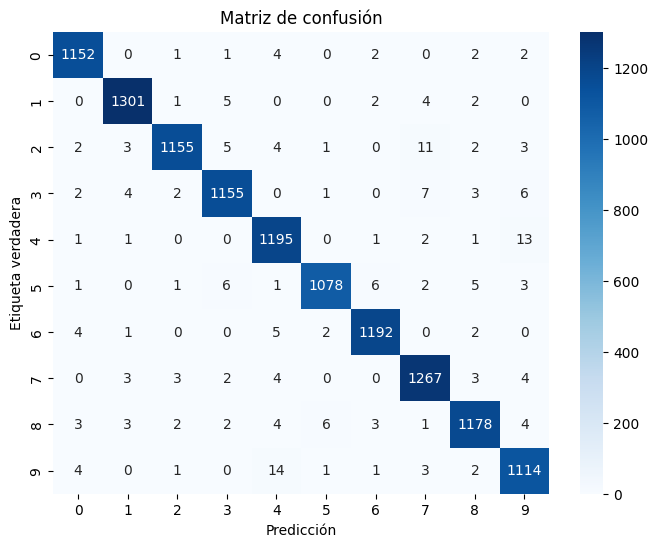

In [3]:
from sklearn.metrics import classification_report

# Predicciones
y_pred_probs = rnn_net.model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()

In [4]:
# Reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_true, y_pred))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1164
           1       0.99      0.99      0.99      1315
           2       0.99      0.97      0.98      1186
           3       0.98      0.98      0.98      1180
           4       0.97      0.98      0.98      1214
           5       0.99      0.98      0.98      1103
           6       0.99      0.99      0.99      1206
           7       0.98      0.99      0.98      1286
           8       0.98      0.98      0.98      1206
           9       0.97      0.98      0.97      1140

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [9]:
# Github, me encontre este codigo y fue costoso hacer que se subiera a github desde aqui

import os
from google.colab import drive
import shutil

drive.mount('/content/drive')
%cd /content/drive/MyDrive/DcDD/Modulo_6

if not os.path.exists("LSTM"):
    !git clone https://github.com/Diego296Ramos/LSTM.git

%cd LSTM
notebook_original = "/content/drive/MyDrive/DcDD/Modulo_6/Proyecto1_Diego_Ramos.ipynb"
notebook_limpio = "Proyecto1_Diego_Ramos_LIMPIO.ipynb"

shutil.copy(notebook_original, notebook_limpio)

!git add {notebook_limpio}
!git commit -m "Subiendo notebook"

os.environ["GIT_TOKEN"] = "aqui iba el token pero me rendi lo subi manual"

!git push https://TOKENIBAAQUI@github.com/Diego296Ramos/LSTM.git #Me rendi, baje el archivo y lo subi asi manual


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 3.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/content/drive/MyDrive/DcDD/Modulo_6/LSTM
NOTICE: Removing 'origin' remote; see 'Why is my origin removed?'
        in the manual if you want to push back there.
        (was https://github.com/Diego296Ramos/LSTM.git)
Parsed 4 commits
New history written in 0.50 seconds; now repacking/cleaning...
Repacking your repo and cleaning out old unneeded objects
HEAD is now at ea5a327 Subiendo notebook
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (9/9), don